### Data visualization, the data contains s3l2 altimetry data, tgauge data, and the remote sensing image.

In [41]:
import os
root_proj = '/Users/luo/OneDrive/GitHub/sentinel3-altimetry-l2'
os.chdir(root_proj)


In [42]:
import matplotlib.pyplot as plt
from osgeo import gdal
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
from utils.ransac_filter import ransac_filter


In [43]:
# root_dir = os.path.dirname(os.getcwd())
## s3 data
path_s3l2 = 'data/s3-altimetry/s3a-orbit-289/S3A_SR_2_LAN____20200523T030933_20200523T035741_20200617T203903_2888_058_289______LN3_O_NT_004.SEN3/enhanced_measurement.nc'
path_s3l2_subs = 'data/s3-altimetry/s3a-orbit-289/S3A_SR_2_LAN____20200523T030933_20200523T035741_20200617T203903_2888_058_289______LN3_O_NT_004.SEN3/enhanced_measurement_subs.nc'
## remote sensing data
path_rsimg = 'data/rs_img/dianchi_s2_20200511_wgs84.tif'
path_rsimg_wat = 'data/rs_img/dianchi_s2_20200511_wat_wgs84.tif'


### Data reading

In [44]:
## 1. s3l2 altimetry data
s3_l2 = xr.open_dataset(path_s3l2)
s3_l2_subs = xr.open_dataset(path_s3l2_subs)
## 2. remote sensing image
img_gdal = gdal.Open(path_rsimg)
rs_img, rs_img_info = readTiff(path_rsimg)
rs_wat, rs_wat_info = readTiff(path_rsimg_wat)



### Visualization from global perspective

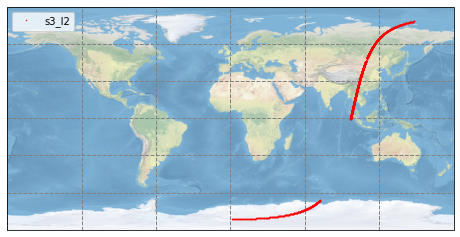

In [45]:
proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=proj)
ax.stock_img()
ax.plot(s3_l2['lon_01'], s3_l2['lat_01'], marker='.', markersize=1, 
        linewidth=0.0, label='s3_l2', color='red')
ax.gridlines(linewidth=1, color='gray', linestyle='--')
ax.legend()


### Visualization from local perspective

In [46]:
### data filtering
elev_filter = np.copy(s3_l2_subs['elevation_ocog_20_ku'])   ## land filter
elev_filter[s3_l2_subs['surf_class_20_ku'] != 2] = np.nan   ## ransac filter
elev_filter, elev_land_ransac_pred = ransac_filter(x=s3_l2_subs['lon_20_ku'], y=elev_filter, thre=0.2)
# elev_filter


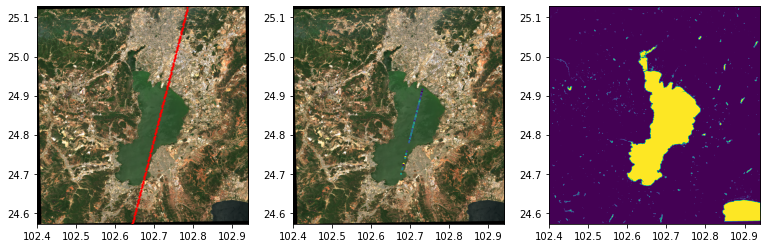

In [52]:
fig = plt.figure(figsize=(13, 4))
plt.subplot(1,3,1)
imgShow(rs_img, extent=rs_img_info['geoextent'])
plt.scatter(x=s3_l2_subs['lon_20_ku'], y=s3_l2_subs['lat_20_ku'], s=1, color='red')  ## altimetry data
plt.subplot(1,3,2)
imgShow(rs_img, extent=rs_img_info['geoextent'])
plt.scatter(x=s3_l2_subs['lon_20_ku'], y=s3_l2_subs['lat_20_ku'], c=elev_filter, s=1)  ## filtered altimetry data
plt.subplot(1,3,3)
imgShow(rs_wat, extent=rs_wat_info['geoextent'])


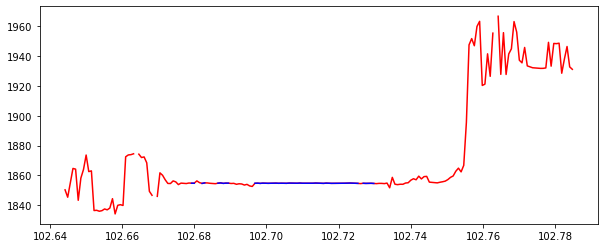

In [53]:
plt.figure(figsize=(10,4))
plt.plot(s3_l2_subs['lon_20_ku'], s3_l2_subs['elevation_ocog_20_ku'], 'r')
plt.plot(s3_l2_subs['lon_20_ku'], elev_filter, 'b') 
